为了构建一个更实用的示例，我们将根据五大湖的地理位置和它们之间的自然水流路径预设湖泊之间的连接。五大湖包括苏必利尔湖、密歇根湖、休伦湖、伊利湖和安大略湖，它们通过多条河流和水道相连。下面是它们之间的基本连接情况：

1. **苏必利尔湖**流入**休伦湖**，通过圣玛丽河（St. Marys River）。
2. **密歇根湖**和**休伦湖**实际上是通过密歇根-休伦湖道（Straits of Mackinac）相连，这里我们可以将它们视为一个水系，因此这个连接在模型中可能不需要显式表示。
3. **休伦湖**流入**伊利湖**，通过底特律河（Detroit River）。
4. **伊利湖**流入**安大略湖**，通过尼亚加拉河（Niagara River）。

基于这些信息，我们可以设置一个简化的网络模型。请注意，由于密歇根湖和休伦湖通常被视为一个连续的水体，我们在这里将它们视为一个节点，简化为“密歇根-休伦”。

### 节点和边的定义

- **节点**：苏必利尔湖、密歇根-休伦、伊利湖、安大略湖。
- **边**：(苏必利尔湖, 密歇根-休伦)、(密歇根-休伦, 伊利湖)、(伊利湖, 安大略湖)。

假设每条边的流量容量基于平均流量数据，我们将使用上文定义的`ideal_levels`作为最佳水位的参考。下面是基于这些信息的简化代码示例，它假设我们已经有了每条边的流量容量数据（这里使用示例数据），并尝试找到一种方式来维持最佳水位：

请注意，这个代码示例只是一个概念模型。在实际应用中，您需要根据具体的流量数据、水位变化、环境约束等因素来详细设计和调整模型。此外，实际实现可能需要专业的水资源管理和网络流优化软件。

In [1]:
import sys
!{sys.executable} -m  pip install networkx==2.5 -i https://pypi.tuna.tsinghua.edu.cn/simple

'C:\Users\Jiacheng' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [2]:
import sys
!{sys.executable} -m  pip install decorator==4.4.2

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


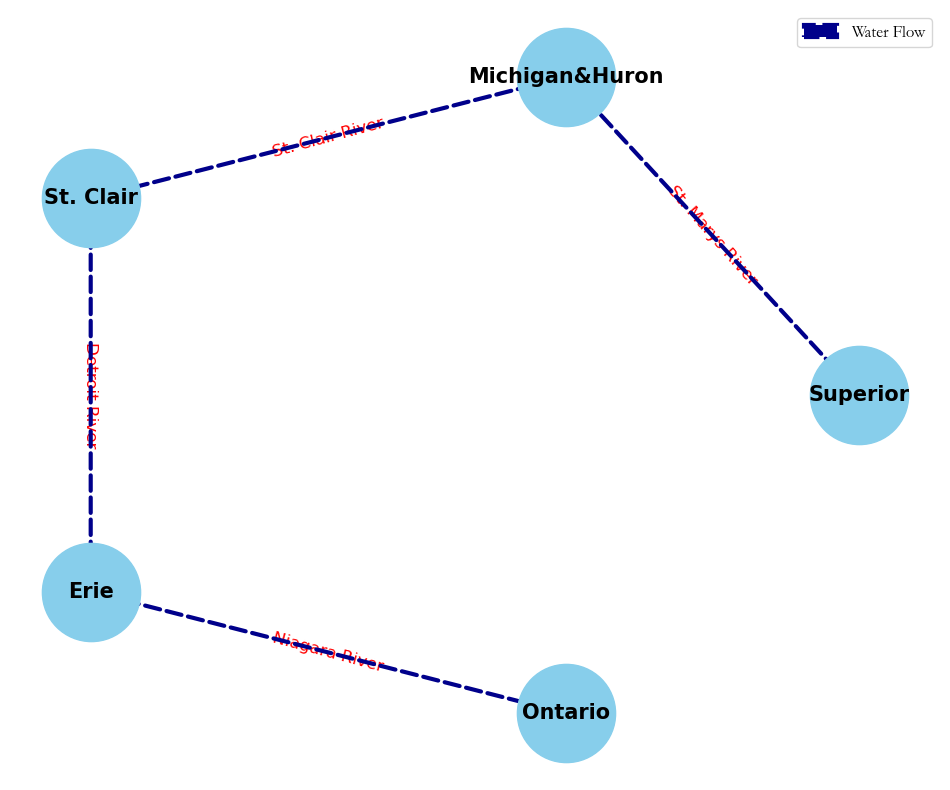

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.style'] = 'normal'

# 创建有向图
G = nx.DiGraph()

# 添加节点
nodes = ['Superior', 'Michigan&Huron', 'St. Clair', 'Erie', 'Ontario']
G.add_nodes_from(nodes)

# 更新边属性，将流量容量替换为河流名称
edges_with_rivers = [
    ('Superior', 'Michigan&Huron', {'river': 'St. Marys River'}),
    ('Michigan&Huron', 'St. Clair', {'river': 'St. Clair River'}),
    ('St. Clair', 'Erie', {'river': 'Detroit River'}),
    ('Erie', 'Ontario', {'river': 'Niagara River'})
]
G.add_edges_from(edges_with_rivers)

# 优化布局
pos = nx.circular_layout(G)  # 使用circular_layout布局

# 绘制网络图
plt.figure(figsize=(12, 10))

# 节点标签
node_labels = {node: node for node in nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=15, font_color='black', font_weight='bold')

# 边标签（显示河流名称）
edge_labels = {(u, v): data['river'] for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, font_color='red')

# 绘制边的曲线
nx.draw_networkx_edges(G, pos, edge_color='darkblue', width=3, arrowstyle='->', arrowsize=40, style='dashed')

# 绘制图形
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color='skyblue')

# 添加图例
plt.legend(['Water Flow'], loc='upper right', fontsize=12)

plt.axis("off")  # 关闭坐标轴
plt.savefig(r'C:\Users\Jiacheng Zheng\Desktop\ICM\ICM2024\Q2\Q2_1.svg', format='svg', bbox_inches='tight')
plt.show()


In [16]:
import pandas as pd

# 读取数据
data = pd.read_csv('data.csv')

# 查看数据信息和前几行
data_info = data.info()
data_head = data.head()

# 获取唯一的湖泊来源
unique_sources = data['Source'].unique()

# 计算每个湖泊理想水位的历史平均值
lake_means = data.groupby('Source').mean().drop(columns='Year')

# 定义目标函数：最小化各湖泊历史平均水位与理想水位的差异总和
def calculate_total_difference(ideal_levels, actual_levels):
    return abs(actual_levels - ideal_levels).sum().sum()

# 假设理想水位为各湖泊历史平均水位的平均值
ideal_water_levels = lake_means.mean(axis=1)

# 简化模型，不考虑具体的约束编程实现，而是展示如何根据理想水位计算差异总和
# 在实际应用中，应使用线性规划或其他优化算法，并考虑具体的约束条件

# 显示理想水位
print("Ideal Water Levels:")
print(ideal_water_levels)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  253 non-null    object 
 1   Year    253 non-null    int64  
 2   Jan     253 non-null    float64
 3   Feb     253 non-null    float64
 4   Mar     253 non-null    float64
 5   Apr     253 non-null    float64
 6   May     253 non-null    float64
 7   Jun     253 non-null    float64
 8   Jul     253 non-null    float64
 9   Aug     253 non-null    float64
 10  Sep     253 non-null    float64
 11  Oct     253 non-null    float64
 12  Nov     253 non-null    float64
 13  Dec     253 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 27.8+ KB
Ideal Water Levels:
Source
Detroit River - Flow                               5862.666542
Lake Erie - Mean Water Level                        174.280761
Lake Michigan and Lake Huron - Mean Water Level     176.328913
Lake Ontario - Mean Wat

In [20]:
# 计算每个湖泊历史最大水位的平均值
lake_max = data.groupby('Source').max().drop(columns='Year')

# 定义目标函数：最小化各湖泊历史最大水位与理想水位的差异总和
def calculate_total_difference(ideal_levels, actual_levels):
    return abs(actual_levels - ideal_levels).sum().sum()

# 假设理想水位为各湖泊历史最大水位的最大值
ideal_water_max = lake_max.max(axis=1)

# 简化模型，不考虑具体的约束编程实现，而是展示如何根据理想水位计算差异总和
# 在实际应用中，应使用线性规划或其他优化算法，并考虑具体的约束条件

# 显示理想水位的最大值
print("Ideal Maximum Water Levels:")
print(ideal_water_max)

Ideal Maximum Water Levels:
Source
Detroit River - Flow                                7676.696374
Lake Erie - Mean Water Level                         175.140000
Lake Michigan and Lake Huron - Mean Water Level      177.450000
Lake Ontario - Mean Water Level                       75.910000
Lake St. Clair - Mean Water Level                    176.040000
Lake Superior - Mean Water Level                     183.880000
Niagara River - Flow at Buffalo                     8070.000000
Ottawa River - Flow at Carillon                     7731.000000
St. Clair River - Flow                              7011.250543
St. Lawrence River - Flow at Cornwall              10420.598545
St. Mary's River - Flow                             3191.308305
dtype: float64


In [44]:
import numpy as np
from scipy.optimize import minimize

def calculate_monthly_flows(data, month):
    """
    Calculate monthly flows for each river.
    """
    rivers = ['St. Mary\'s River - Flow ', 'St. Clair River - Flow ', 'Detroit River - Flow ', 'Niagara River - Flow at Buffalo']
    return [data[data['Source'] == river][month].mean(numeric_only=True) for river in rivers]

def adjust_initial_flows(monthly_flows):
    """
    Adjust initial flows based on dam impact.
    """
    return np.array(monthly_flows)

def objective_function(flows, ideal_levels, max_capacity):
    """
    Objective function: minimize water level differences.
    """
    return sum(abs(ideal_levels[node] - flows[i] / max_capacity[river]) for i, (node, river) in enumerate(zip(ideal_levels.keys(), max_capacity.keys())))

def optimize_water_levels(data, ideal_levels, max_capacity, months):
    """
    Optimize water levels for each month.
    """
    result_dataframe = []

    for month in months:
        monthly_flows = calculate_monthly_flows(data, month)
        initial_flows = adjust_initial_flows(monthly_flows)

        # Flow non-negativity constraints
        bounds = [(0, max_capacity[river]) for river in max_capacity]

        # Solve optimization problem
        optimization_result = minimize(objective_function, initial_flows, args=(ideal_levels, max_capacity), bounds=bounds, method='SLSQP')
        optimized_levels = optimization_result.x
        result_dataframe.append([month] + list(optimized_levels))

    return result_dataframe

# Define months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Optimize water levels
result_dataframe = optimize_water_levels(data, ideal_water_levels, max_flow_capacity, months)

# Display the results or save them to a CSV file
for row in result_dataframe:
    print(row)
# You can save to CSV using pd.DataFrame(result_dataframe, columns=['Month', 'St. Mary\'s River', 'St. Clair River', 'Detroit River', 'Niagara River']).to_csv('optimized_water_levels.csv', index=False)


['Jan', 1994.678935089285, 5098.852265779651, 5489.624711235096, 5851.428571428571]
['Feb', 1944.7401582865161, 4930.164781561308, 5289.586435585286, 5788.571428571429]
['Mar', 1939.9869737791646, 5522.998134371819, 5994.6758480375, 5894.285714285714]
['Apr', 1916.1401459741974, 5726.272620750038, 6050.702746273088, 6115.714285714286]
['May', 2031.0458531497854, 5780.6814136214225, 5932.176528345091, 6318.095238095238]
['Jun', 2256.083856676559, 5790.187782636126, 6006.811638269036, 6253.333333333334]
['Jul', 2480.3532601553366, 5782.299518985628, 5940.469318336642, 6220.0]
['Aug', 2507.598109225134, 5837.921890880166, 5856.732365739044, 6084.285714285714]
['Sep', 2356.305257671991, 5850.866733793804, 5939.255739313488, 5857.619047619048]
['Oct', 2308.591375745003, 5794.947709249163, 5988.634921344468, 5839.047619047619]
['Nov', 2242.1276979102936, 5766.0645284981065, 5972.211151897791, 5876.190476190476]
['Dec', 2041.1792379931187, 5631.411193773536, 5891.117104728396, 5963.8095238095

In [45]:
# 将结果存储在DataFrame中或进行其他分析
pd.DataFrame(newdf,columns=['month','Marys', 'Clair', 'Detroit', 'Niagara'])

,month,Marys,Clair,Detroit,Niagara
0,Jan,1994.678935,5098.852266,5489.624711,5851.428571
1,Feb,1944.740158,4930.164782,5289.586436,5788.571429
2,Mar,1939.986974,5522.998134,5994.675848,5894.285714
3,Apr,1916.140146,5726.272621,6050.702746,6115.714286
4,May,2031.045853,5780.681414,5932.176528,6318.095238
5,Jun,2256.083857,5790.187783,6006.811638,6253.333333
6,Jul,2480.353260,5782.299519,5940.469318,6220.000000
7,Aug,2507.598109,5837.921891,5856.732366,6084.285714
8,Sep,2356.305258,5850.866734,5939.255739,5857.619048
9,Oct,2308.591376,5794.947709,5988.634921,5839.047619


In [28]:
pd.DataFrame(newdf,columns=['month','Marys', 'Clair', 'Detroit', 'Niagara']).to_csv('Q2.csv')